In [ ]:
# IMPORTATION DES LIBRAIRIES PYTHON

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy.stats as spy
import statsmodels.api
pd.set_option('display.max_columns', 500)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# fonction google d'importation pour charger le fichier
from google.colab import files
file = files.upload()

# Description des donnees : Dataset 1


Emissions de CO2 et de polluants des véhicules commercialisés en France - data.gouv.fr

In [ ]:
df=pd.read_csv("cl_JUIN_2013-complet3.csv",encoding='latin-1',sep=";")
# informations sur l'ensemble de données
display(df.head(6))
display(df.describe(include='object'))
display(df.info())
display(df.shape)
display(df.isna().sum())

,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),Boîte de vitesse,Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),CO type I (g/km),HC (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,M 6,11.3,5.8,7.8,182.0,0.647,0.052,0.032,NaN,0.002,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C,GO,non,9,125.0,M 6,6.6,4.3,5.1,136.0,0.192,NaN,0.169,0.190,0.003,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,M 6,6.6,4.2,5.1,134.0,0.066,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100.0,M 6,6.6,4.2,5.1,134.0,0.066,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,M 6,6.9,4.3,5.3,139.0,0.060,NaN,0.164,0.193,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
5,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000H305,939AXS1B66B,GO,non,9,125.0,M 6,6.9,4.3,5.3,139.0,0.060,NaN,0.164,0.193,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER


,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Boîte de vitesse,Champ V9,Date de mise à jour,Carrosserie,gamme
count,44850,44850,44850,44850,44850,44850,44850,44850,44850,44615,44850,44850,44850
unique,51,458,419,3582,44191,28781,13,2,16,13,3,10,7
top,MERCEDES-BENZ,VIANO,VIANO,VIANO 2.2 CDI,M10LADVP000T028,263AXG1B05,GO,non,M 6,715/2007*692/2008EURO5,juin-13,MINIBUS,MOY-INFER
freq,38450,14031,14031,5874,16,32,37778,44593,19364,26426,43910,32744,20428


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44850 entries, 0 to 44849
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44850 non-null  object 
 1   Modèle dossier                        44850 non-null  object 
 2   Modèle UTAC                           44850 non-null  object 
 3   Désignation commerciale               44850 non-null  object 
 4   CNIT                                  44850 non-null  object 
 5   Type Variante Version (TVV)           44850 non-null  object 
 6   Carburant                             44850 non-null  object 
 7   Hybride                               44850 non-null  object 
 8   Puissance administrative              44850 non-null  int64  
 9   Puissance maximale (kW)               44850 non-null  float64
 10  Boîte de vitesse                      44850 non-null  object 
 11  Consommation ur

None

(44850, 26)

Marque                                      0
Modèle dossier                              0
Modèle UTAC                                 0
Désignation commerciale                     0
CNIT                                        0
Type Variante Version (TVV)                 0
Carburant                                   0
Hybride                                     0
Puissance administrative                    0
Puissance maximale (kW)                     0
Boîte de vitesse                            0
Consommation urbaine (l/100km)             42
Consommation extra-urbaine (l/100km)       42
Consommation mixte (l/100km)               39
CO2 (g/km)                                 39
CO type I (g/km)                          303
HC (g/km)                               34447
NOX (g/km)                                303
HC+NOX (g/km)                           10659
Particules (g/km)                        3142
masse vide euro min (kg)                    0
masse vide euro max (kg)          

In [ ]:
df.select_dtypes(include = ['object']).columns # libellés colonnes catégorielles

Index(['Marque', 'Modèle dossier', 'Modèle UTAC', 'Désignation commerciale',
       'CNIT', 'Type Variante Version (TVV)', 'Carburant', 'Hybride',
       'Boîte de vitesse', 'Champ V9', 'Date de mise à jour', 'Carrosserie',
       'gamme'],
      dtype='object')

In [ ]:
df.select_dtypes(include = ['int64','float64']).columns # libellés colonnes numeriques

Index(['Puissance administrative', 'Puissance maximale (kW)',
       'Consommation urbaine (l/100km)',
       'Consommation extra-urbaine (l/100km)', 'Consommation mixte (l/100km)',
       'CO2 (g/km)', 'CO type I (g/km)', 'HC (g/km)', 'NOX (g/km)',
       'HC+NOX (g/km)', 'Particules (g/km)', 'masse vide euro min (kg)',
       'masse vide euro max (kg)'],
      dtype='object')

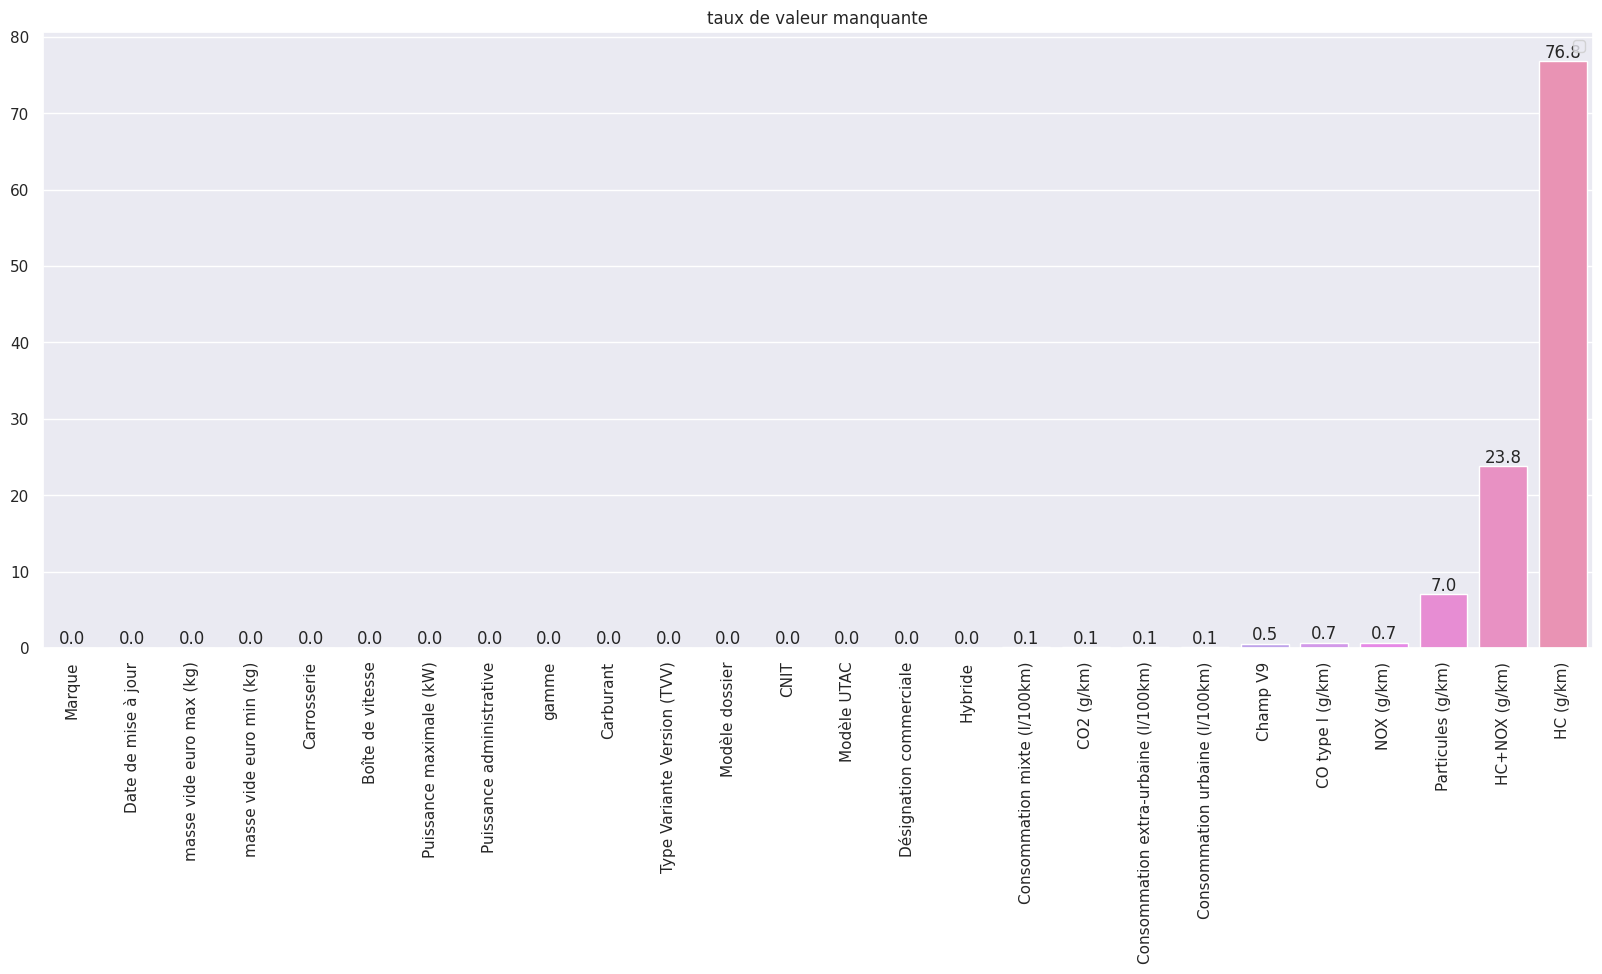

In [ ]:
# distribution des Nan
nan_values = df.isna().sum()
size=df.shape
nan_values = nan_values.sort_values(ascending=True)*100/size[0]
plt.figure(figsize = (20,8))
ax = sns.barplot(x= nan_values.index, y= nan_values.values)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.title('taux de valeur manquante')
plt.xticks(rotation=90);
plt.legend()


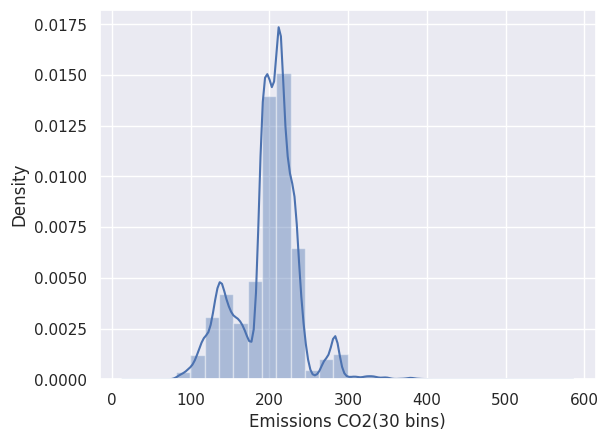

La moyenne des emissions de CO2 (g/km) est : 198.91089241480887
La médiane des emissions de CO2 (g/km) est : 203.0
Le mode des emissions de CO2 (g/km) est :0    203.0
Name: CO2 (g/km), dtype: float64


In [ ]:
# analyse variable cible
sns.distplot(df['CO2 (g/km)'], bins=30, kde=True, axlabel='Emissions CO2(30 bins)')
plt.show()

mean = df['CO2 (g/km)'].mean()
mode = df['CO2 (g/km)'].mode()
median = df['CO2 (g/km)'].median()

print(f'La moyenne des emissions de CO2 (g/km) est : {mean}')
print(f'La médiane des emissions de CO2 (g/km) est : {median}')
print(f'Le mode des emissions de CO2 (g/km) est :{mode}')

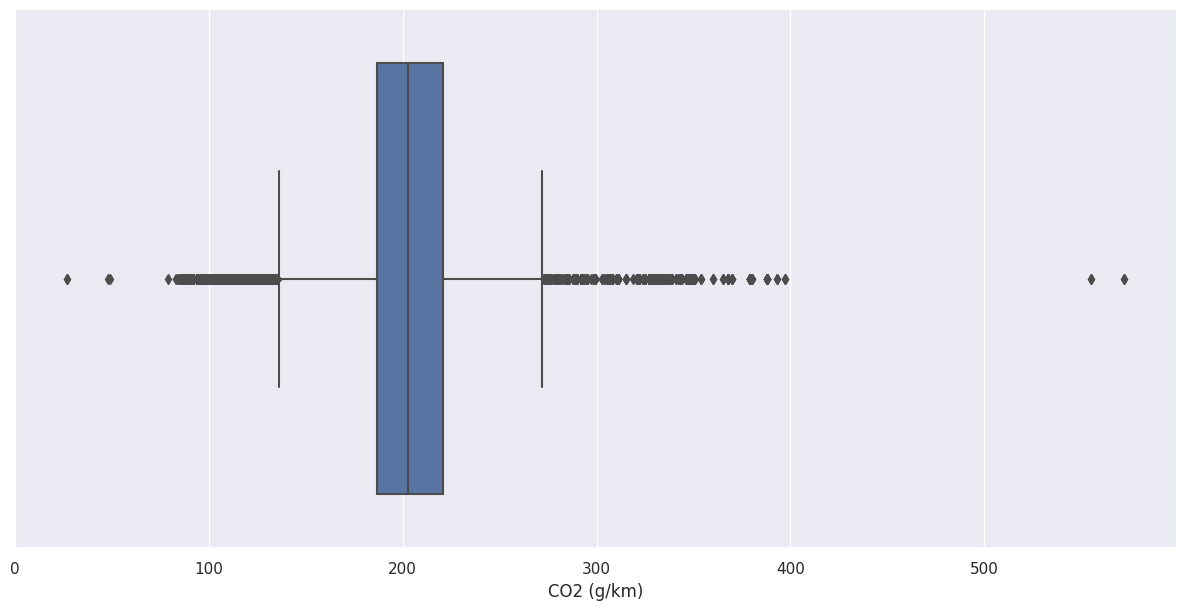

In [ ]:
# distribution des emissions de CO2
plt.figure(figsize = (15,7))
sns.boxplot(x = df['CO2 (g/km)']);

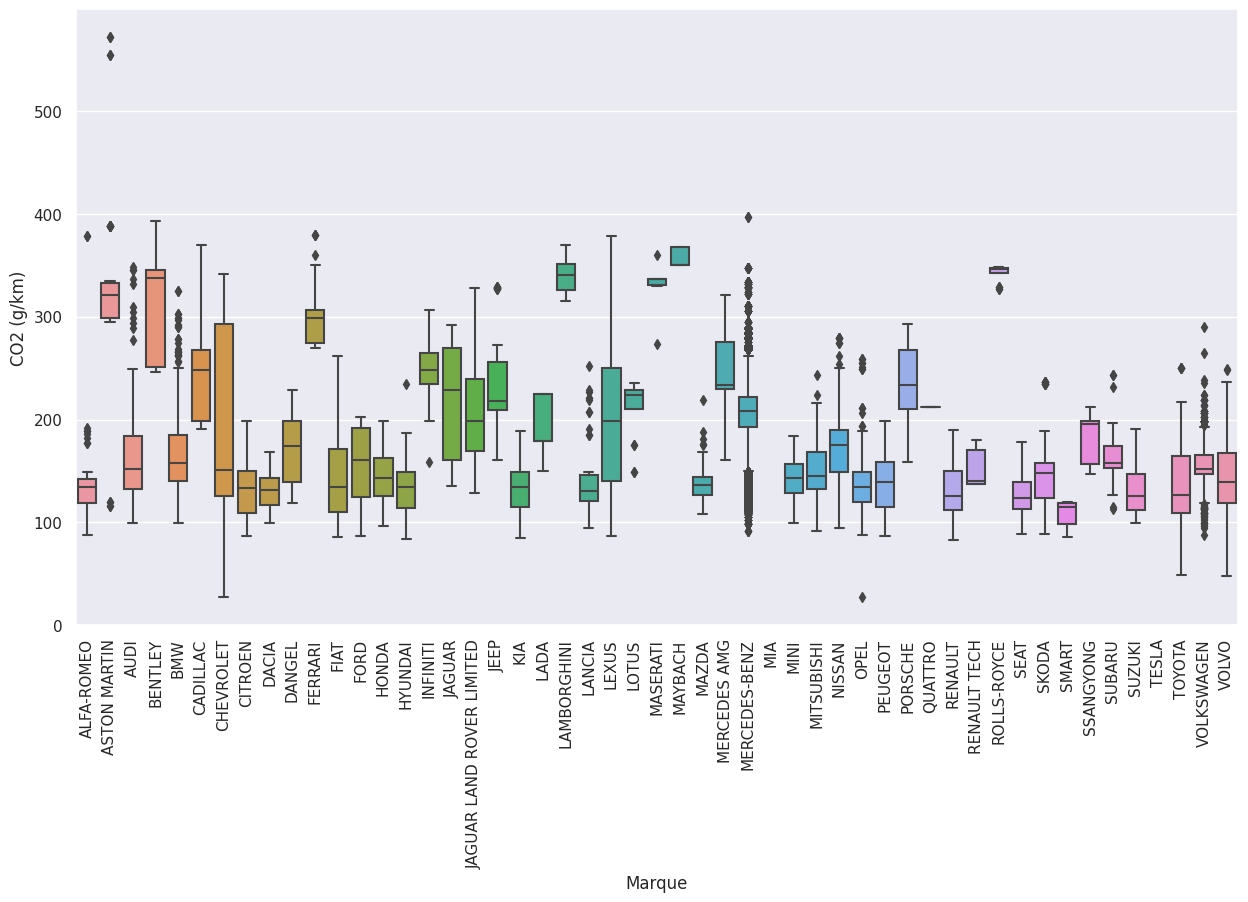

In [ ]:
# distribution des emissions de CO2 par marque
plt.figure(figsize = (15,8))
sns.boxplot(x="Marque", y="CO2 (g/km)", data=df)
plt.xticks(rotation = 90)
plt.show()

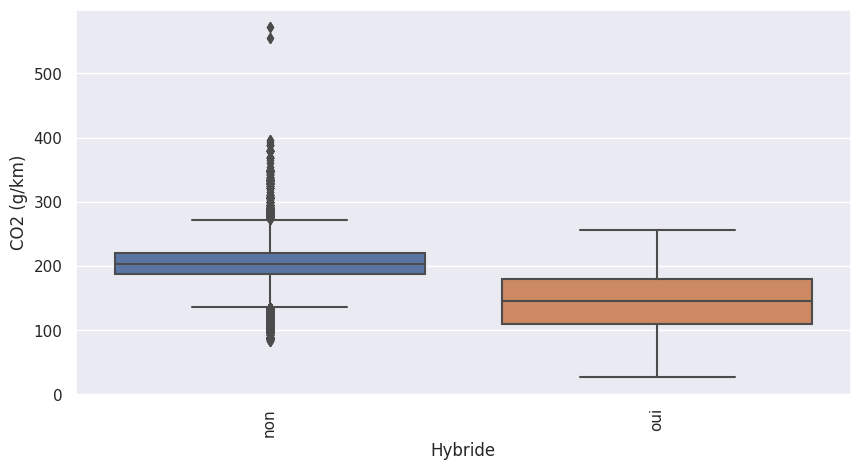

In [ ]:
# distribution des emissions de CO2 par rapport à la variable Hybride
plt.figure(figsize = (10,5))
sns.boxplot(x="Hybride", y="CO2 (g/km)", data=df)
plt.xticks(rotation = 90)
plt.show()

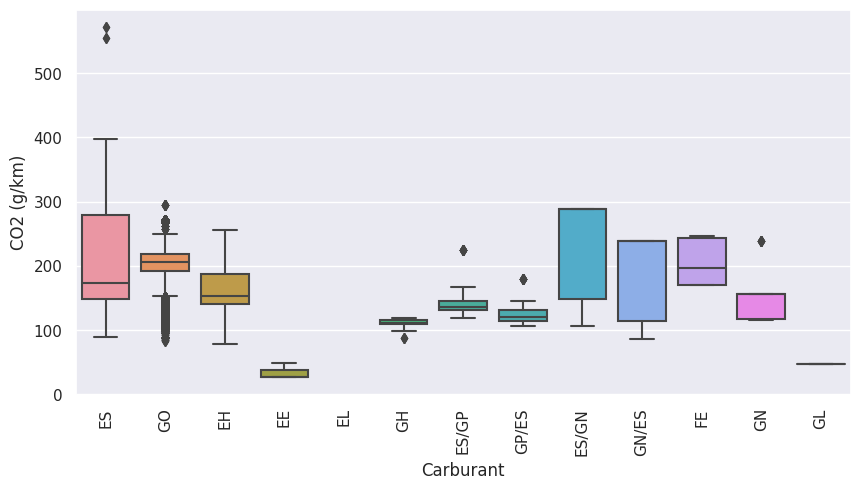

In [ ]:
# distribution des emissions de CO2 pour chaque type de carburant
plt.figure(figsize = (10,5))
sns.boxplot(x="Carburant", y="CO2 (g/km)", data=df)
plt.xticks(rotation = 90)
plt.show()

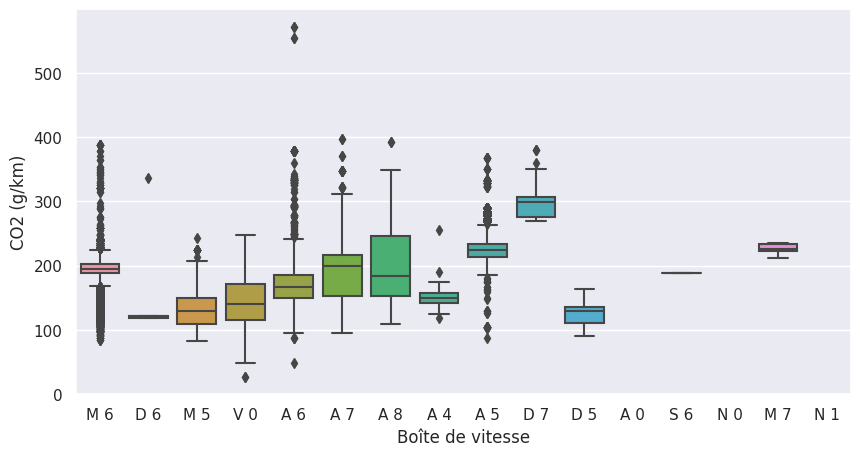

In [ ]:
# les boites à moustaches de CO2 pour chaque type de boite de vitesse
plt.figure(figsize = (10,5))
sns.boxplot(x="Boîte de vitesse", y="CO2 (g/km)", data=df)
plt.show()

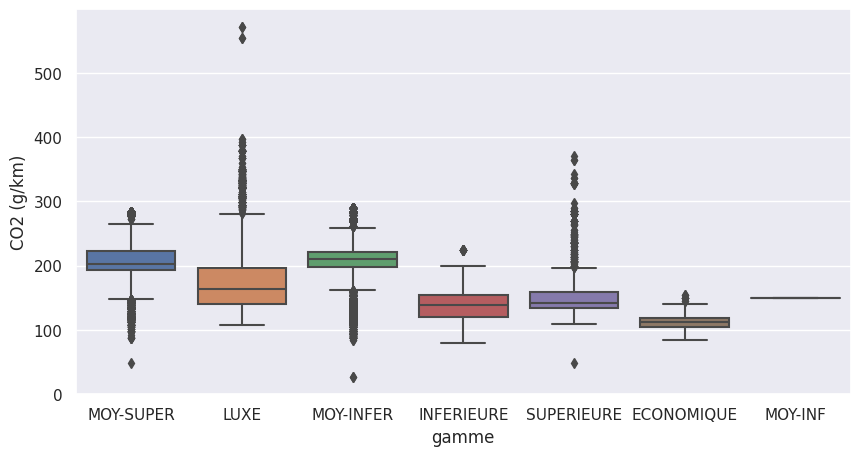

In [ ]:
# les boites à moustaches de CO2 pour chaque type de gamme
plt.figure(figsize = (10,5))
sns.boxplot(x="gamme", y="CO2 (g/km)", data=df)
plt.show()



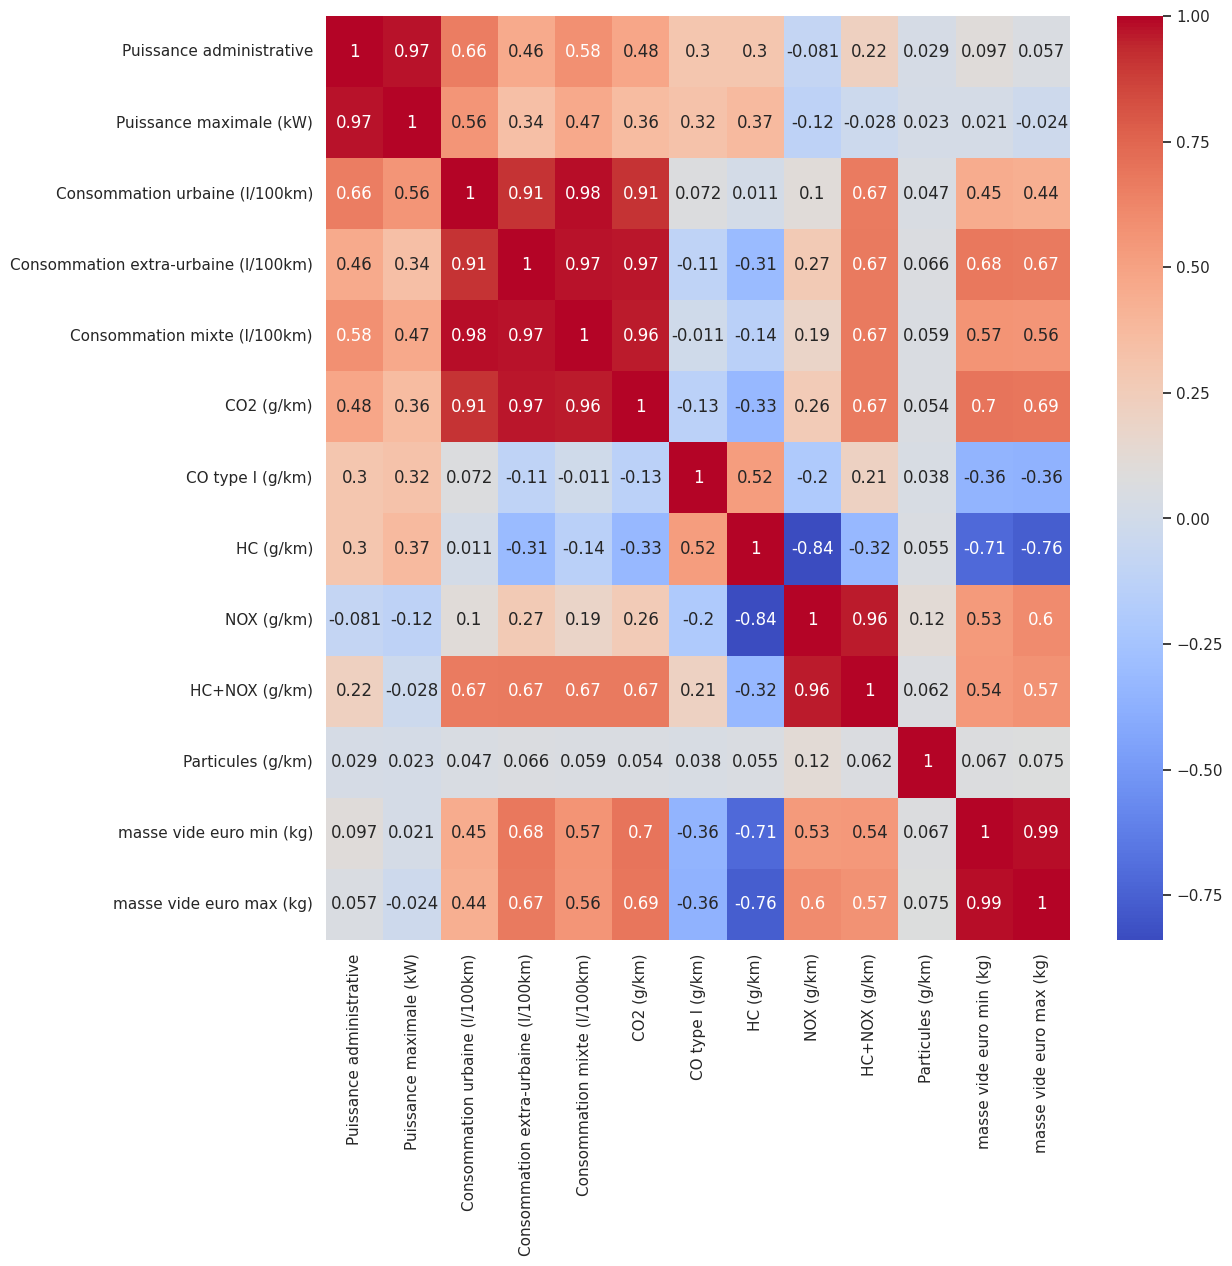

In [ ]:
# Relations entre les variables num ́eriques : matrice de corr ́elation
cor = df.corr()
fig, ax = plt.subplots(figsize=(12,12));
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');


In [ ]:
# testes statistiques
# test ANOVA relation entre le type de boite à vitesse et la variable cible co2
print('les modalités de la colonne "Boite à vitesse" sont ' , df['Boîte de vitesse'].unique())
# H0 : il y a aucune influence de type la Boite à vitesse sur l'émission de CO2
# H1 : il y a une influence  significative de type de la Boite à vitesse sur l'émission de CO2

df_copie=df.copy()
df_copie.rename(columns = {'Boîte de vitesse':'Boîte_de_vitesse', 'CO2 (g/km)':'CO2'}, inplace = True)
##  Le test ANOVA :
import statsmodels.api
result = statsmodels.formula.api.ols('CO2 ~ Boîte_de_vitesse', data=df_copie).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# on conclut donc a une influence significative du type de la boite à vitesse sur l'emission du CO2


In [ ]:
##  Le test ANOVA :relation entre le type de Carburant et la variable cible co2

result = statsmodels.formula.api.ols('CO2 ~ Carburant', data=df_copie).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# on conclut donc qu'il y a une influence significative du type de carburant sur l'emission du CO2

In [ ]:
##  Le test ANOVA :relation entre le la variable Hybride et la variable cible co2

result = statsmodels.formula.api.ols('CO2 ~ Hybride', data=df_copie).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# on conclut donc qu'il y a une influence significative du type de moteur sur l'emission du CO2

In [ ]:
##  Le test ANOVA : relation entre la gamme et la variable cible co2

result = statsmodels.formula.api.ols('CO2 ~ gamme', data=df_copie).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)
## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
# on conclut donc qu'il y a une influence significative du type de moteur sur l'emission du CO2

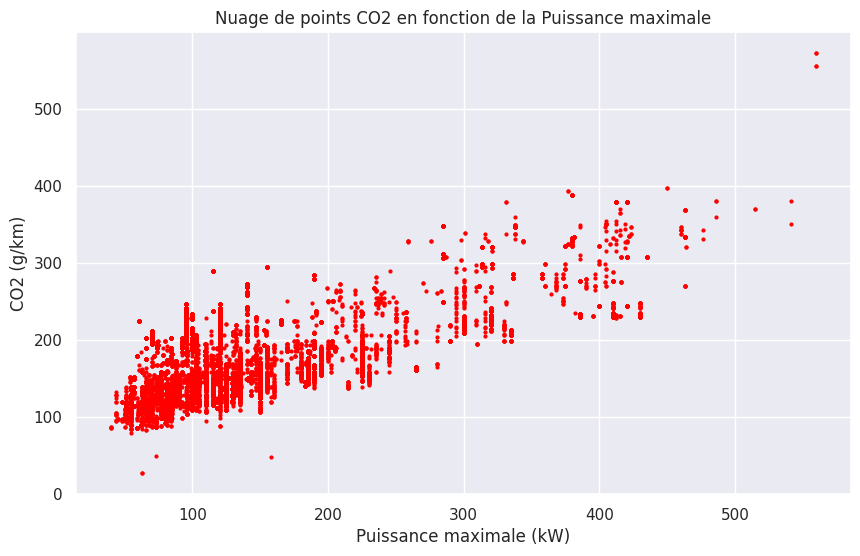

In [ ]:
#Nuage de points CO2 en fonction de la Puissance maximale
plt.figure(figsize=(10, 6))
plt.scatter(df['Puissance maximale (kW)'], df['CO2 (g/km)'], marker='o', color='red', s=4)
plt.xlabel('Puissance maximale (kW)')
plt.ylabel('CO2 (g/km)')
plt.title('Nuage de points CO2 en fonction de la Puissance maximale')
plt.grid(True)
plt.show()


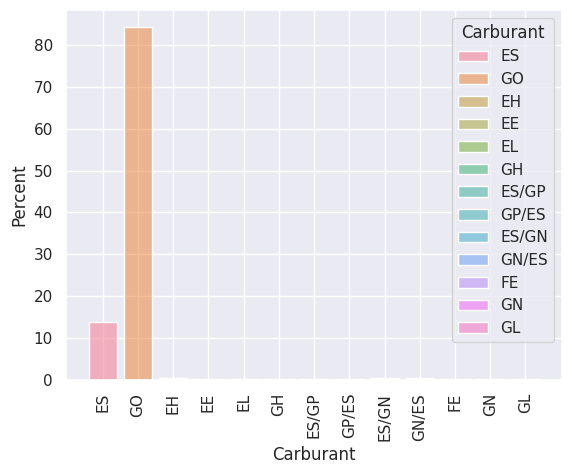

In [ ]:
#distribution des types de carburant

a = sns.histplot(df, x="Carburant", hue = "Carburant" , stat="percent", shrink=.8)
plt.xticks(rotation=90);


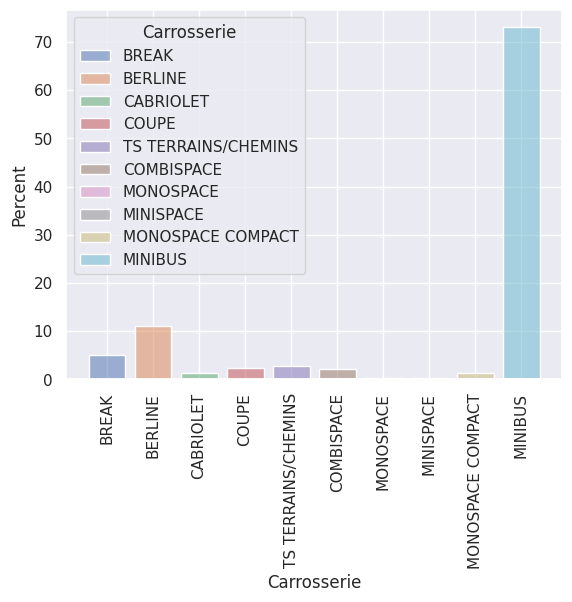

In [ ]:
#La distribution des types des types de carosseries
sns.histplot(df, x="Carrosserie", hue = "Carrosserie" , stat="percent", shrink=.8)
plt.xticks(rotation=90);


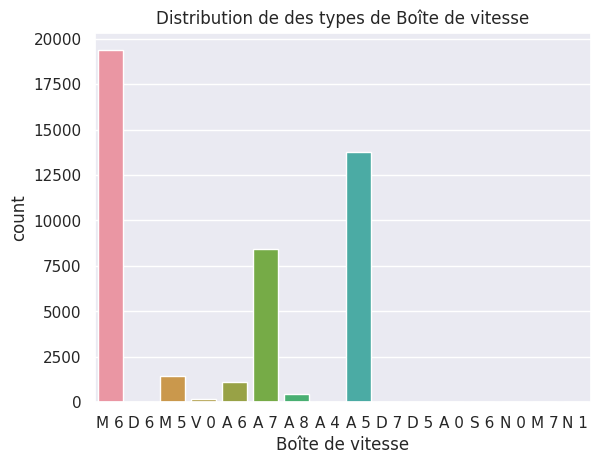

In [ ]:
#La distribution des types des types de boite
sns.countplot(x='Boîte de vitesse', data=df);
plt.title('Distribution de des types de Boîte de vitesse');

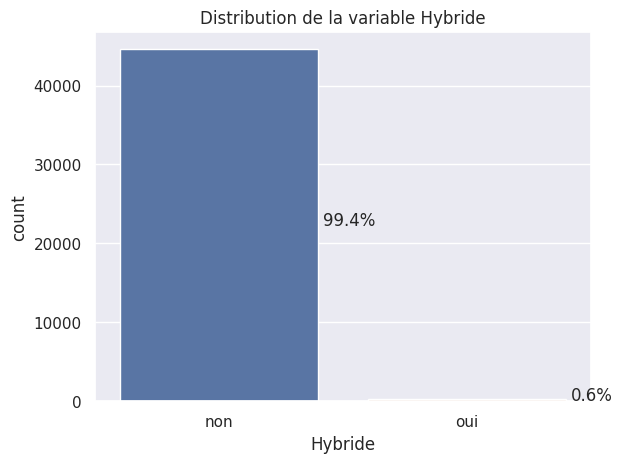

In [ ]:
#La distribution variable hybride
ax = sns.countplot(x="Hybride", data=df )
plt.title('Distribution de la variable Hybride')
total = len(df['Hybride'])
for p in ax.containers[0]:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))
plt.show()

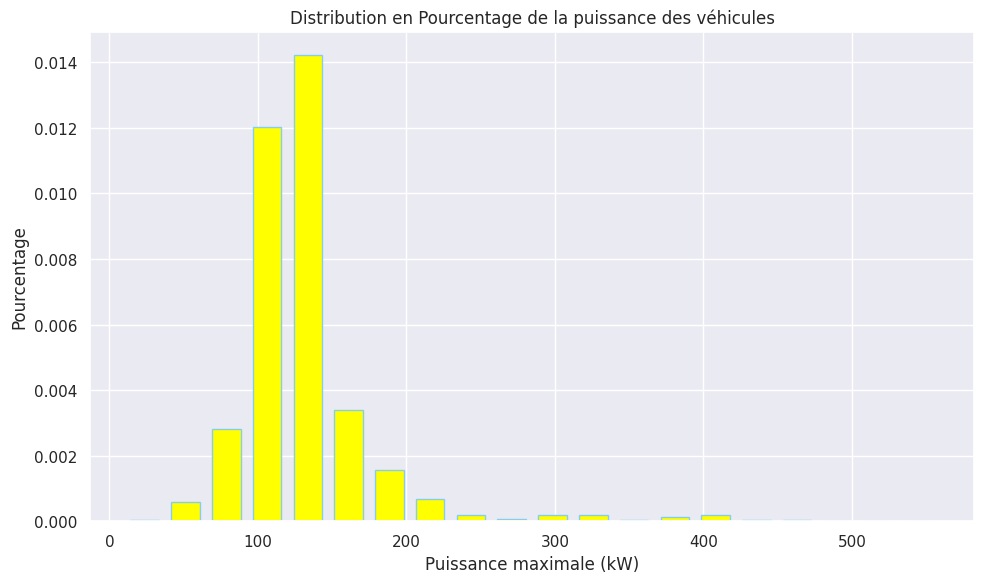

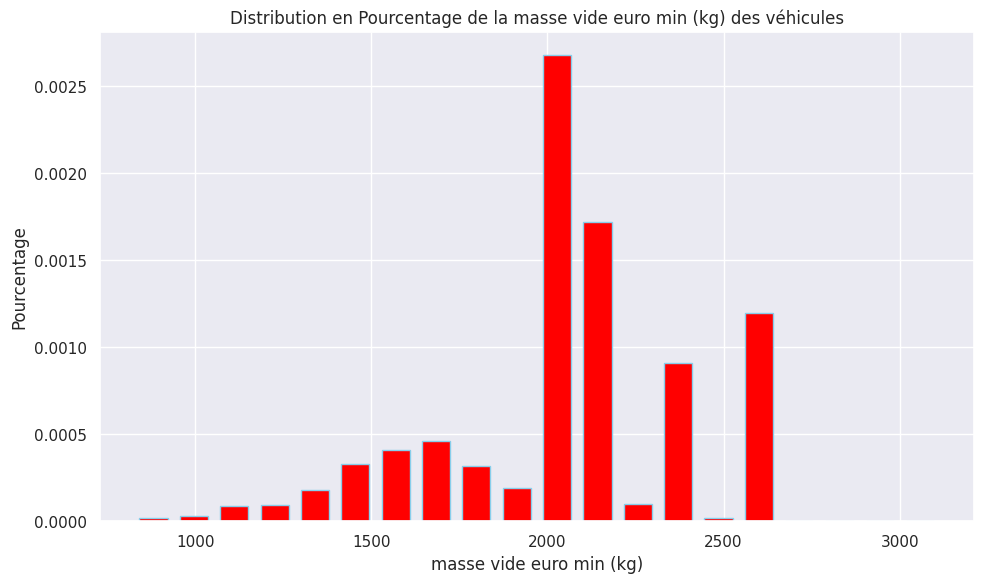

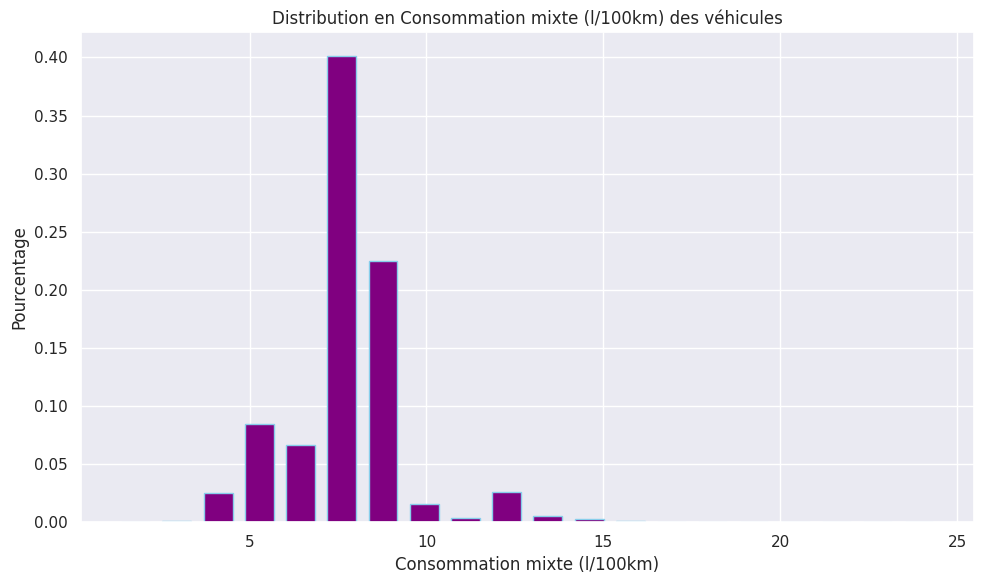

In [ ]:
#Distribution en Pourcentage de la puissance des véhicules
plt.figure(figsize=(10, 6))
plt.hist(df['Puissance maximale (kW)'], bins=20, color='yellow', edgecolor='skyblue', rwidth=0.7, density=True)
plt.xlabel('Puissance maximale (kW)')
plt.ylabel('Pourcentage')
plt.title('Distribution en Pourcentage de la puissance des véhicules')
plt.tight_layout()
plt.show()

#Distribution en Pourcentage de la masse vide euro min (kg) des véhicules
plt.figure(figsize=(10, 6))
plt.hist(df['masse vide euro min (kg)'], bins=20, color='red', edgecolor='skyblue', rwidth=0.7, density=True)
plt.xlabel('masse vide euro min (kg)')
plt.ylabel('Pourcentage')
plt.title('Distribution en Pourcentage de la masse vide euro min (kg) des véhicules')
plt.tight_layout()
plt.show()


#Distribution en Pourcentage de la conso mixte des véhicules
plt.figure(figsize=(10, 6))
plt.hist(df['Consommation mixte (l/100km)'], bins=20, color='purple', edgecolor='skyblue', rwidth=0.7, density=True)
plt.xlabel('Consommation mixte (l/100km)')
plt.ylabel('Pourcentage')
plt.title('Distribution en Consommation mixte (l/100km) des véhicules')
plt.tight_layout()
plt.show()



# Description des données : Dataset 2




Analyse Exploratoire DATASET https://www.eea.europa.eu/data-and-maps/data/co2-cars-emission-20


In [ ]:
# fonction google d'importation pour charger le fichier
from google.colab import files
file = files.upload()
# fichier trop  volumineux au chargement

In [ ]:
df2=pd.read_csv(file)
# informations sur l'ensemble de données
display(df2.head(6))
display(df2.describe(include='object'))
display(df2.info())

In [ ]:
df2.select_dtypes(include = ['object']).columns # libellés colonnes catégorielles

In [ ]:
df2.select_dtypes(include = ['int64','float64']).columns # libellés colonnes numeriques

In [ ]:
# analyse variable cible
sns.distplot(df2['Enedc (g/km)'], bins=30, kde=True, axlabel='Emissions CO2(30 bins)')
plt.show()

mean = df2['Enedc (g/km)'].mean()
mode = df2['Enedc (g/km)'].mode()
median = df2['Enedc (g/km)'].median()

print(f'La moyenne des emissions de CO2 (g/km) est : {mean}')
print(f'La médiane des emissions de CO2 (g/km) est : {median}')
print(f'Le mode des emissions de CO2 (g/km) est :{mode}')

In [ ]:
# distribution des emissions de CO2 par marque
plt.figure(figsize = (15,8))
sns.boxplot(x="Mk", y="Enedc (g/km)", data=df2)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Analyse exploratoire de la moyenne des emissions de CO2 selon 4 variables catégorielles
def explore_cat_feature(feature):
    group= df2.groupby(feature).mean()
    plt.figure(figsize=[15,5])
    plots = group['Enedc (g/km)'].sort_values().plot(kind = 'bar', fontsize=15)
    plt.xlabel(feature, fontsize=15);
    plt.ylabel('Moyenne des emissions de Co2 ', fontsize=15);
    plt.title("Moyenne des emissions de Co2 selon {} \n".format(feature), fontsize=20)

for feature in ['Fm','Ft','Cm','Ct']:
    explore_cat_feature(feature)

# DERNIERE PARTIE: PREPROCESSING DU DATASET RETENU POUR LE PROJET

In [ ]:
df=pd.read_csv("cl_JUIN_2013-complet3.csv",encoding='latin-1',sep=";") # Chargement du dataset

In [ ]:
# dedoublonnage des lignes selon les critères ci-dessous
df=df.drop_duplicates(subset=['Marque', 'Modèle dossier', 'Modèle UTAC', 'Désignation commerciale',
       'Carburant', 'Hybride', 'Puissance administrative',
       'Puissance maximale (kW)', 'Boîte de vitesse',
       'Consommation urbaine (l/100km)',
       'Consommation extra-urbaine (l/100km)', 'Consommation mixte (l/100km)',
       'CO2 (g/km)', 'CO type I (g/km)', 'HC (g/km)', 'NOX (g/km)',
       'HC+NOX (g/km)', 'Particules (g/km)'],keep='first')
display(df.shape)
display(df.head(6))
display(df.describe(include='object'))
display(df.info())

(5409, 26)

,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),Boîte de vitesse,Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),CO type I (g/km),HC (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,M 6,11.3,5.8,7.8,182.0,0.647,0.052,0.032,NaN,0.002,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C,GO,non,9,125.0,M 6,6.6,4.3,5.1,136.0,0.192,NaN,0.169,0.190,0.003,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,M 6,6.6,4.2,5.1,134.0,0.066,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,M 6,6.9,4.3,5.3,139.0,0.060,NaN,0.164,0.193,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
6,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147.0,M 6,11.5,6.0,8.0,186.0,0.647,0.052,0.032,NaN,0.002,1555,1555,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER
7,ALFA-ROMEO,159,159,159 SW 2.0 JTDm (170ch) ECO,M10ALFVP000S255,939BXP1B55C,GO,non,9,125.0,M 6,6.7,4.4,5.2,139.0,0.192,NaN,0.169,0.190,0.003,1615,1615,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER


,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Boîte de vitesse,Champ V9,Date de mise à jour,Carrosserie,gamme
count,5409,5409,5409,5409,5409,5409,5409,5409,5409,5384,5409,5409,5409
unique,51,458,419,3582,5388,5137,13,2,16,13,3,10,7
top,MERCEDES-BENZ,CLASSE E,SPRINTER,SPRINTER COMBI 213 CDI - 37,M10FATVP001Z447,F149CDEB,GO,non,M 6,715/2007*566/2011EURO5,juin-13,BERLINE,MOY-INFER
freq,1321,349,209,38,2,4,3072,5328,2093,1771,4582,1816,1493


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5409 entries, 0 to 44849
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                5409 non-null   object 
 1   Modèle dossier                        5409 non-null   object 
 2   Modèle UTAC                           5409 non-null   object 
 3   Désignation commerciale               5409 non-null   object 
 4   CNIT                                  5409 non-null   object 
 5   Type Variante Version (TVV)           5409 non-null   object 
 6   Carburant                             5409 non-null   object 
 7   Hybride                               5409 non-null   object 
 8   Puissance administrative              5409 non-null   int64  
 9   Puissance maximale (kW)               5409 non-null   float64
 10  Boîte de vitesse                      5409 non-null   object 
 11  Consommation urb

None

In [ ]:
df = df.drop(['HC (g/km)','HC+NOX (g/km)','Particules (g/km)'],axis=1) # Suppression des colonnes avec un taux important de valeurs nulles
df.shape
df = df.dropna(subset=['CO2 (g/km)','CO type I (g/km)','Consommation urbaine (l/100km)'],axis = 0 , how = 'any') # Suppression des lignes avec des valeurs nulles
df.shape

(5363, 23)